In [3]:
import pandas as pd 
import numpy as np


In [5]:
client = pd.read_csv(r"C:\Users\user\Downloads\Churn_Project\client_data.csv")
price = pd.read_csv(r"C:\Users\user\Downloads\Churn_Project\price_data.csv")
combined = pd.concat([price, client], axis = 1) # combining both datasets 

In [6]:
combined.head()

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix,id,channel_sales,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,...,t,0.00,25.44,25.44,2.0,678.99,3.0,lxidpiddsbxsbosboudacockeimpuepw,43.648,1.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0,d29c2c54acc38ff3c0614d0a653813dd,MISSING,...,f,0.00,16.38,16.38,1.0,18.89,6.0,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,...,f,0.00,28.60,28.60,1.0,6.60,6.0,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0.0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,...,f,0.00,30.22,30.22,1.0,25.46,6.0,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0.0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0,149d57cf92fc41cf94415803a877cb4b,MISSING,...,f,52.32,44.91,44.91,1.0,47.98,6.0,kamkkxfxxuwbdslkwifmmcsiusiuosws,19.800,0.0


In [9]:
columns_to_drop = ['id','channel_sales','origin_up','price_date','date_activ','date_end','date_renewal','date_modif_prod']	
combined = combined.drop( columns = columns_to_drop, axis =1) #dropping uneccessary columns that do not have effect on churn

In [11]:
combined = combined.dropna() #cleaning 

In [13]:
combined['has_gas'] = combined['has_gas'].replace({'t' : 1, 'f' : 0})
combined


C:\Users\user\AppData\Local\Temp\ipykernel_16536\2928907577.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  combined['has_gas'] = combined['has_gas'].replace({'t' : 1, 'f' : 0})


,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,...,forecast_price_pow_off_peak,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn
0,0.151367,0.000000,0.000000,44.266931,0.00000,0.000000,0.0,54946.0,0.0,0.00,...,40.606701,1,0.00,25.44,25.44,2.0,678.99,3.0,43.648,1.0
1,0.151367,0.000000,0.000000,44.266931,0.00000,0.000000,4660.0,0.0,0.0,189.95,...,44.311378,0,0.00,16.38,16.38,1.0,18.89,6.0,13.800,0.0
2,0.151367,0.000000,0.000000,44.266931,0.00000,0.000000,544.0,0.0,0.0,47.96,...,44.311378,0,0.00,28.60,28.60,1.0,6.60,6.0,13.856,0.0
3,0.149626,0.000000,0.000000,44.266931,0.00000,0.000000,1584.0,0.0,0.0,240.04,...,44.311378,0,0.00,30.22,30.22,1.0,25.46,6.0,13.200,0.0
4,0.149626,0.000000,0.000000,44.266931,0.00000,0.000000,4425.0,0.0,526.0,445.75,...,40.606701,0,52.32,44.91,44.91,1.0,47.98,6.0,19.800,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14601,0.129808,0.107582,0.075514,40.728885,24.43733,16.291555,32270.0,47940.0,0.0,4648.01,...,44.311378,1,0.00,27.88,27.88,2.0,381.77,4.0,15.000,0.0
14602,0.129808,0.107582,0.075514,40.728885,24.43733,16.291555,7223.0,0.0,181.0,631.69,...,58.995952,0,15.94,0.00,0.00,1.0,90.34,3.0,6.000,1.0
14603,0.121647,0.103413,0.075460,40.728885,24.43733,16.291555,1844.0,0.0,179.0,190.39,...,40.606701,0,18.05,39.84,39.84,1.0,20.38,4.0,15.935,1.0
14604,0.121647,0.103413,0.075460,40.728885,24.43733,16.291555,131.0,0.0,0.0,19.34,...,44.311378,0,0.00,13.08,13.08,1.0,0.96,3.0,11.000,0.0


In [15]:
X = combined.drop(columns=['churn'])
y = combined['churn']

In [17]:
from sklearn.model_selection import train_test_split 

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify =y)

In [19]:
combined['churn'].value_counts(1,0)

churn
1.0    0.097152
0.0    0.902848
Name: proportion, dtype: float64

In [20]:
from xgboost import XGBClassifier 
scale_pos_weight = (y == 0).sum() / (y == 1).sum()  #calculates negative instances and positive instances within the data 
model = XGBClassifier( scale_pos_weight=scale_pos_weight,
    max_depth=4,
    learning_rate=0.05,
    n_estimators=200,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42) 

In [21]:
model.fit(X_train, y_train)

,"objective objective: typing.Union[str, xgboost.sklearn._SklObjWProto, typing.Callable[[typing.Any, typing.Any], typing.Tuple[numpy.ndarray, numpy.ndarray]], NoneType]Specify the learning task and the corresponding learning objective or a customobjective function to be used.For custom objective, see :doc:`/tutorials/custom_metric_obj` and:ref:`custom-obj-metric` for more information, along with the end note forfunction signatures.",'binary:logistic'
,"base_score base_score: typing.Union[float, typing.List[float], NoneType]The initial prediction score of all instances, global bias.",None
,booster,None
,"callbacks callbacks: typing.Optional[typing.List[xgboost.callback.TrainingCallback]]List of callback functions that are applied at end of each iteration.It is possible to use predefined callbacks by using:ref:`Callback API `... note:: States in callback are not preserved during training, which means callback objects can not be reused for multiple training sessions without reinitialization or deepcopy... code-block:: python for params in parameters_grid: # be sure to (re)initialize the callbacks before each run callbacks = [xgb.callback.LearningRateScheduler(custom_rates)] reg = xgboost.XGBRegressor(**params, callbacks=callbacks) reg.fit(X, y)",None
,colsample_bylevel colsample_bylevel: typing.Optional[float]Subsample ratio of columns for each level.,None
,colsample_bynode colsample_bynode: typing.Optional[float]Subsample ratio of columns for each split.,None
,colsample_bytree colsample_bytree: typing.Optional[float]Subsample ratio of columns when constructing each tree.,0.8
,"device device: typing.Optional[str].. versionadded:: 2.0.0Device ordinal, available options are `cpu`, `cuda`, and `gpu`.",None
,"early_stopping_rounds early_stopping_rounds: typing.Optional[int].. versionadded:: 1.6.0- Activates early stopping. Validation metric needs to improve at least once in every **early_stopping_rounds** round(s) to continue training. Requires at least one item in **eval_set** in :py:meth:`fit`.- If early stopping occurs, the model will have two additional attributes: :py:attr:`best_score` and :py:attr:`best_iteration`. These are used by the :py:meth:`predict` and :py:meth:`apply` methods to determine the optimal number of trees during inference. If users want to access the full model (including trees built after early stopping), they can specify the `iteration_range` in these inference methods. In addition, other utilities like model plotting can also use the entire model.- If you prefer to discard the trees after `best_iteration`, consider using the callback function :py:class:`xgboost.callback.EarlyStopping`.- If there's more than one item in **eval_set**, the last entry will be used for early stopping. If there's more than one metric in **eval_metric**, the last metric will be used for early stopping.",None
,enable_categorical enable_categorical: boolSee the same parameter of :py:class:`DMatrix` for details.,False
,"eval_metric eval_metric: typing.Union[str, typing.List[typing.Union[str, typing.Callable]], typing.Callable, NoneType].. versionadded:: 1.6.0Metric used for monitoring the training result and early stopping. It can be astring or list of strings as names of predefined metric in XGBoost (See:doc:`/parameter`), one of the metrics in :py:mod:`sklearn.metrics`, or anyother user defined metric that looks like `sklearn.metrics`.If custom objective is also provided, then custom metric should implement thecorresponding reverse link function.Unlike the `scoring` parameter commonly used in scikit-learn, when a callableobject is provided, it's assumed to be a cost function and by default XGBoostwill minimize the result during early stopping.For advanced usage on Early stopping like directly choosing to maximize insteadof minimize, see :py:obj:`xgboost.callback.EarlyStopping`.See :doc:`/tutorials/custom_metric_obj` and :ref:`custom-obj-metric` for moreinformation... code-block:: python from sklearn.datasets import load_diabetes f

In [22]:
y_pred = model.predict(X_test)

In [23]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.93      0.75      0.83      2638
         1.0       0.18      0.50      0.26       284

    accuracy                           0.73      2922
   macro avg       0.56      0.62      0.55      2922
weighted avg       0.86      0.73      0.78      2922



In [24]:
importance = model.feature_importances_
feature_importance_df = pd.DataFrame({'features' : X_train.columns, 
'importance' : importance}).sort_values('importance', ascending = False)
print(feature_importance_df)

                          features  importance
19              margin_net_pow_ele    0.108564
22                 num_years_antig    0.057150
18            margin_gross_pow_ele    0.052641
6                         cons_12m    0.048693
9                forecast_cons_12m    0.044178
12         forecast_meter_rent_12m    0.043778
7                     cons_gas_12m    0.042110
8                  cons_last_month    0.041290
21                      net_margin    0.041004
17                        imp_cons    0.038921
1                   price_peak_var    0.038495
23                         pow_max    0.038163
11        forecast_discount_energy    0.036833
4                   price_peak_fix    0.036191
15     forecast_price_pow_off_peak    0.035883
14      forecast_price_energy_peak    0.035443
10              forecast_cons_year    0.034965
16                         has_gas    0.034535
13  forecast_price_energy_off_peak    0.034378
2               price_mid_peak_var    0.034017
0            

In [25]:
imp_features = ['margin_net_pow_ele', 'num_years_antig', 'margin_gross_pow_ele', 'cons_12m', 'forecast_cons_12m', 'forecast_meter_rent_12m']
X_reduced = combined[imp_features]
y1 = combined['churn']
X1_train, X1_test, y1_train, y1_test = train_test_split(X_reduced, y1, random_state = 42, test_size = 0.25, stratify = y1)

In [26]:
scale_pos_weight = (y1 == 0).sum() / (y1 == 1).sum()
xgb_reduced = XGBClassifier( scale_pos_weight=scale_pos_weight,
    max_depth=4,
    learning_rate=0.05,
    n_estimators=200,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=421)

In [27]:
xgb_reduced.fit(X1_train, y1_train)

y_proba = xgb_reduced.predict_proba(X1_test)[:, 1]

y_pred_03 = (y_proba >= 0.3).astype(int)
y_pred_02 = (y_proba >= 0.2).astype(int)


In [28]:
y_pred1 = xgb_reduced.predict(X1_test)
print(classification_report(y1_test, y_pred1))


              precision    recall  f1-score   support

         0.0       0.94      0.72      0.81      3297
         1.0       0.18      0.57      0.27       355

    accuracy                           0.70      3652
   macro avg       0.56      0.64      0.54      3652
weighted avg       0.87      0.70      0.76      3652



In [29]:
print(classification_report(y1_test, y_pred_02))


              precision    recall  f1-score   support

         0.0       0.97      0.08      0.16      3297
         1.0       0.10      0.97      0.19       355

    accuracy                           0.17      3652
   macro avg       0.53      0.53      0.17      3652
weighted avg       0.88      0.17      0.16      3652



In [30]:
print (classification_report(y1_test, y_pred_03))

              precision    recall  f1-score   support

         0.0       0.95      0.22      0.35      3297
         1.0       0.11      0.90      0.20       355

    accuracy                           0.28      3652
   macro avg       0.53      0.56      0.27      3652
weighted avg       0.87      0.28      0.34      3652



Text(0.5, 1.0, 'Receiver Operating Characteristic (ROC) Curve')

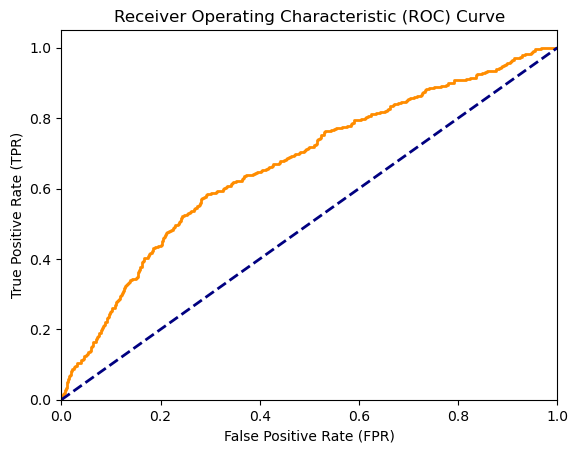

In [31]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt 
fpr, tpr, thresholds = roc_curve(y1_test, y_proba)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guessing (AUC = 0.5)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')

In [32]:
import pickle
with open('xg_boost_model.pkl', 'wb') as file: 
    pickle.dump(xgb_reduced, file) 

with open('feature_names.pkl' , 'wb') as file: 
    pickle.dump(imp_features, file)